In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [2]:
data = load_boston()

In [3]:
df = pd.DataFrame(data['data'])
df.columns = data['feature_names']

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


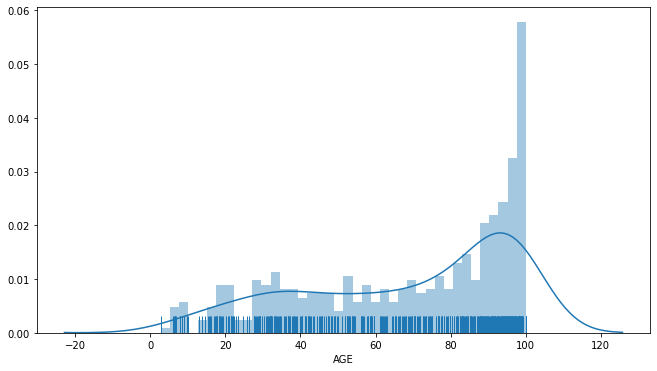

In [5]:
# KDE on House Ages

plt.figure(figsize=(11,6))
sns.distplot(df['AGE'], bins=40)
sns.rugplot(df['AGE'])

In [6]:
from sklearn.neighbors import KernelDensity

age = np.array(df['AGE'])
age = age.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=1.15).fit(age) # bandwidth = 1.15 after GridSearchCV

In [7]:
values = np.asarray([value for value in range(0,125)])
probabilities = kde.score_samples(values.reshape(-1, 1))
probabilities = np.exp(probabilities)

In [8]:
np.max(probabilities)

0.0396183232951994

Text(0, 0.5, 'Probability')

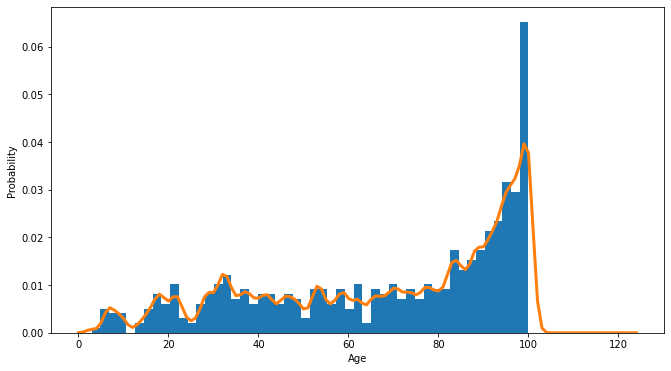

In [9]:
plt.figure(figsize=(11,6))
plt.hist(age, bins=50, density=True)
plt.plot(values, probabilities, lw=3)
plt.xlabel('Age')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

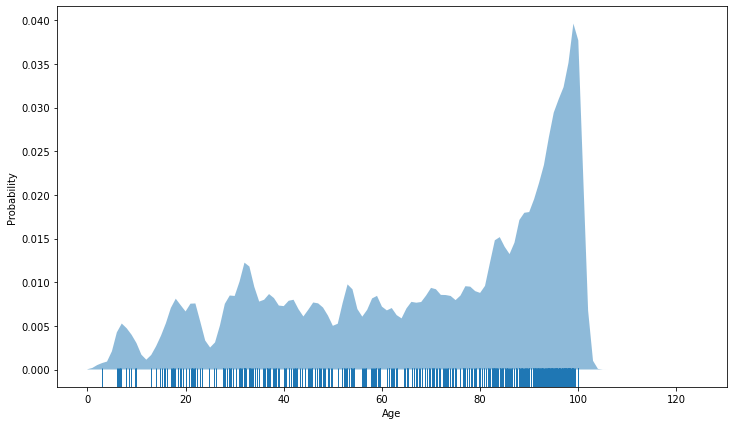

In [10]:
plt.figure(figsize=(12,7))
plt.fill_between(values, probabilities, alpha=0.5)
sns.rugplot(age)
plt.xlabel('Age')
plt.ylabel('Probability')

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut, KFold

cv = KFold(n_splits=6, shuffle=True)
bandwidths = 10 ** np.linspace(-1, 1, 50)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=cv)
print(grid.fit(age))
print()
print(grid.best_params_)

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10985411,  0.12067926,  0.13257114,  0.14...
        1.04811313,  1.1513954 ,  1.26485522,  1.38949549,  1.52641797,
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


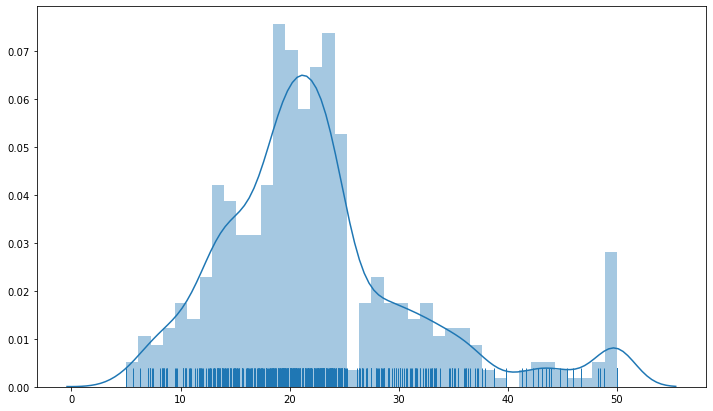

In [12]:
# KDE on House Prices

plt.figure(figsize=(12,7))
sns.distplot(data['target'], bins=40)
sns.rugplot(data['target'])

In [13]:
from sklearn.neighbors import KernelDensity

prices = np.array(data['target'])
prices = prices.reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.8).fit(prices)

In [14]:
values = np.asarray([value for value in range(0,55)])
probabilities = kde.score_samples(values.reshape(-1, 1))
probabilities = np.exp(probabilities)

Text(0, 0.5, 'Probability')

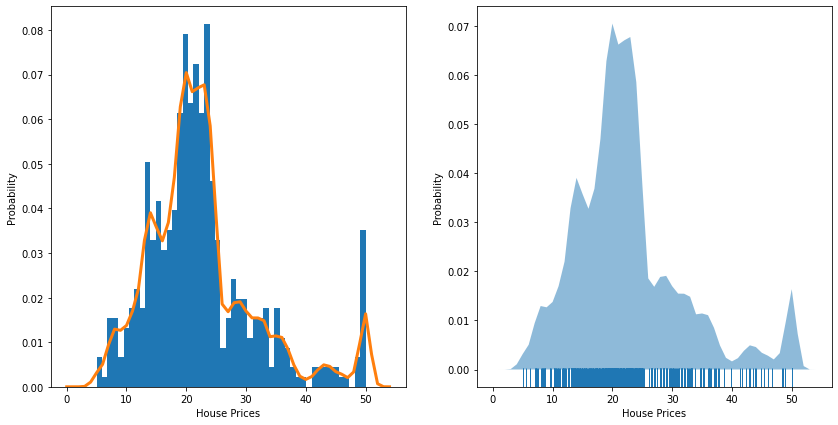

In [15]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.hist(prices, bins=50, density=True)
plt.plot(values, probabilities, lw=3)
plt.xlabel('House Prices')
plt.ylabel('Probability')

plt.subplot(122)
plt.fill_between(values, probabilities, alpha=0.5)
sns.rugplot(prices)
plt.xlabel('House Prices')
plt.ylabel('Probability')

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut, KFold

cv = KFold(n_splits=10, shuffle=True)
bandwidths = 10 ** np.linspace(-1, 1, 50)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=cv)
print(grid.fit(prices))
print()
print(grid.best_params_)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='warn', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10985411,  0.12067926,  0.13257114,  0.1...
        1.04811313,  1.1513954 ,  1.26485522,  1.38949549,  1.52641797,
        1.67683294,  1.84206997,  2.02358965,  2.22299648,  2.44205309,
        2.6826958 ,  2.9470517 ,  3.23745754,  3.55648031,  3.90693994,
        4.29193426,  4.71486636,  5.17947468,  5.68986603,  6.25055193,
        6.86648845,  7.54312006,  8.28642773,  9.10298178, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
